# 0.0 Imports

In [ ]:
import math
import numpy  as np
import pandas as pd
import inflection
import datetime

import seaborn as sns

from matplotlib import pyplot as plt
from IPython.core.display import HTML
from IPython.display import Image

## 0.1 Helper functions

In [38]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:85% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()

In [39]:
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


## 0.2 Loading data

In [40]:
df_sales_raw = pd.read_csv('train.csv', low_memory=False)
df_store_raw = pd.read_csv('store.csv', low_memory=False)

In [41]:
# merge
df_raw = pd.merge(df_sales_raw,df_store_raw, how ='left', on='Store')

# 1.0 Passo 1 - Descrição dos dados

In [42]:
df_raw.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

## 1.1 Rename columns

In [43]:
df1 = df_raw.copy()

In [44]:
cols_old = ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
           'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
           'CompetitionDistance', 'CompetitionOpenSinceMonth',
           'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
           'Promo2SinceYear', 'PromoInterval']

snakecase = lambda x: inflection.underscore (x)

cols_new = list (map (snakecase, cols_old))

In [45]:
df1.columns = cols_new

## 1.2 Data dimensions

In [ ]:
print ('Number of rows: {}'.format(df1.shape[0]))
print ('Number of columns: {}'.format(df1.shape[1]))

## 1.3 Data types 

In [46]:
df1.dtypes

store                             int64
day_of_week                       int64
date                             object
sales                             int64
customers                         int64
open                              int64
promo                             int64
state_holiday                    object
school_holiday                    int64
store_type                       object
assortment                       object
competition_distance            float64
competition_open_since_month    float64
competition_open_since_year     float64
promo2                            int64
promo2_since_week               float64
promo2_since_year               float64
promo_interval                   object
dtype: object

In [47]:
# Convertendo coluna 'date' para tipo 'datetime'
df1['date'] = pd.to_datetime( df1['date'] )

## 1.4 Check NA's

In [48]:
df1.isna().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

## 1.5 Fillout NA

In [49]:
df1['competition_distance'].max()

75860.0

In [50]:
#competition_distance 
df1['competition_distance'] = df1['competition_distance'].apply( lambda x: 200000.0 if math.isnan( x ) else x )

#competition_open_since_month  
df1['competition_open_since_month'] = df1.apply( lambda x: x['date'].month if math.isnan( x['competition_open_since_month'] ) else x['competition_open_since_month'], axis=1 )

#competition_open_since_year  
df1['competition_open_since_year'] = df1.apply( lambda x: x['date'].year if math.isnan( x['competition_open_since_year'] ) else x['competition_open_since_year'], axis=1 )

#promo2_since_week  
df1['promo2_since_week'] = df1.apply( lambda x: x['date'].week if math.isnan( x['promo2_since_week'] ) else x['promo2_since_week'], axis=1 )

#promo2_since_year  
df1['promo2_since_year'] = df1.apply( lambda x: x['date'].year if math.isnan( x['promo2_since_year'] ) else x['promo2_since_year'], axis=1 )

In [51]:
#promo_interval              
month_map = {1: 'Jan',  2: 'Fev',  3: 'Mar',  4: 'Apr',  5: 'May',  6: 'Jun',  7: 'Jul',  8: 'Aug',  9: 'Sep',  10: 'Oct', 11: 'Nov', 12: 'Dec'}

df1['promo_interval'].fillna(0, inplace=True )

df1['month_map'] = df1['date'].dt.month.map( month_map )

df1['is_promo'] = df1[['promo_interval', 'month_map']].apply( lambda x: 0 if x['promo_interval'] == 0 else 1 if x['month_map'] in x['promo_interval'].split( ',' ) else 0, axis=1 )

In [52]:
df1.sample(5).T

,382203,536620,404179,267745,408906
store,1072,1091,519,608,487
day_of_week,2,6,6,5,1
date,2014-07-29 00:00:00,2014-03-08 00:00:00,2014-07-05 00:00:00,2014-11-28 00:00:00,2014-06-30 00:00:00
sales,8464,6418,4721,13804,11791
customers,689,573,562,1233,898
open,1,1,1,1,1
promo,1,0,0,1,1
state_holiday,0,0,0,0,0
school_holiday,1,0,0,0,0
store_type,a,a,c,a,d


In [54]:
df1.isna().sum()

store                           0
day_of_week                     0
date                            0
sales                           0
customers                       0
open                            0
promo                           0
state_holiday                   0
school_holiday                  0
store_type                      0
assortment                      0
competition_distance            0
competition_open_since_month    0
competition_open_since_year     0
promo2                          0
promo2_since_week               0
promo2_since_year               0
promo_interval                  0
month_map                       0
is_promo                        0
dtype: int64

## 1.6 Change types

In [55]:
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

In [56]:
# competiton
df1['competition_open_since_month'] = df1['competition_open_since_month'].astype( int )
df1['competition_open_since_year'] = df1['competition_open_since_year'].astype( int )
    
# promo2
df1['promo2_since_week'] = df1['promo2_since_week'].astype( int )
df1['promo2_since_year'] = df1['promo2_since_year'].astype( int )

## 1.7 Estatística descritiva dos dados 

In [57]:
# Separação de variáveis numéricas e categóricas
num_attributes = df1.select_dtypes( include=['int64', 'float64'] )
cat_attributes = df1.select_dtypes( exclude=['int64', 'float64', 'datetime64[ns]'] )

In [58]:
num_attributes.sample(5)

,store,day_of_week,sales,customers,open,promo,school_holiday,competition_distance,promo2,is_promo
684491,667,6,6419,691,1,0,0,2870.0,0,0
225657,428,6,6094,501,1,0,0,2960.0,1,0
728564,140,1,5610,811,1,0,0,1090.0,1,0
606914,25,5,8774,1358,1,0,1,430.0,0,0
1000175,806,3,4347,391,1,0,0,260.0,1,0


### 1.7.1 Variáveis numéricas

In [59]:
# Tendência central - média, mediana 
ct1 = pd.DataFrame(num_attributes.apply(np.std)).T 
ct2 =  pd.DataFrame(num_attributes.apply(np.median)).T 

In [60]:
# Dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame(num_attributes.apply(np.std)).T 
d2 = pd.DataFrame(num_attributes.apply(min)).T 
d3 = pd.DataFrame(num_attributes.apply(max)).T
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T 
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T 
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T 

In [61]:
# Concatenar
df = pd.concat( [d2, d3, d4, ct1, ct2,d1, d5, d6] ).T.reset_index()
df

,index,0,0,0,0,0,0,0,0
0,store,1.0,1115.0,1114.0,321.908493,558.0,321.908493,-0.000955,-1.200524
1,day_of_week,1.0,7.0,6.0,1.997390,4.0,1.997390,0.001593,-1.246873
2,sales,0.0,41551.0,41551.0,3849.924283,5744.0,3849.924283,0.641460,1.778375
3,customers,0.0,7388.0,7388.0,464.411506,609.0,464.411506,1.598650,7.091773
4,open,0.0,1.0,1.0,0.375539,1.0,0.375539,-1.758045,1.090723
5,promo,0.0,1.0,1.0,0.485758,0.0,0.485758,0.487838,-1.762018
6,school_holiday,0.0,1.0,1.0,0.383056,0.0,0.383056,1.677842,0.815154
7,competition_distance,20.0,200000.0,199980.0,12547.646829,2330.0,12547.646829,10.242344,147.789712
8,promo2,0.0,1.0,1.0,0.500000,1.0,0.500000,-0.002255,-1.999999
9,is_promo,0.0,1.0,1.0,0.362124,0.0,0.362124,1.904152,1.625796


In [62]:
# Muda nome colunas
df.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
df

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,store,1.0,1115.0,1114.0,321.908493,558.0,321.908493,-0.000955,-1.200524
1,day_of_week,1.0,7.0,6.0,1.997390,4.0,1.997390,0.001593,-1.246873
2,sales,0.0,41551.0,41551.0,3849.924283,5744.0,3849.924283,0.641460,1.778375
3,customers,0.0,7388.0,7388.0,464.411506,609.0,464.411506,1.598650,7.091773
4,open,0.0,1.0,1.0,0.375539,1.0,0.375539,-1.758045,1.090723
5,promo,0.0,1.0,1.0,0.485758,0.0,0.485758,0.487838,-1.762018
6,school_holiday,0.0,1.0,1.0,0.383056,0.0,0.383056,1.677842,0.815154
7,competition_distance,20.0,200000.0,199980.0,12547.646829,2330.0,12547.646829,10.242344,147.789712
8,promo2,0.0,1.0,1.0,0.500000,1.0,0.500000,-0.002255,-1.999999
9,is_promo,0.0,1.0,1.0,0.362124,0.0,0.362124,1.904152,1.625796


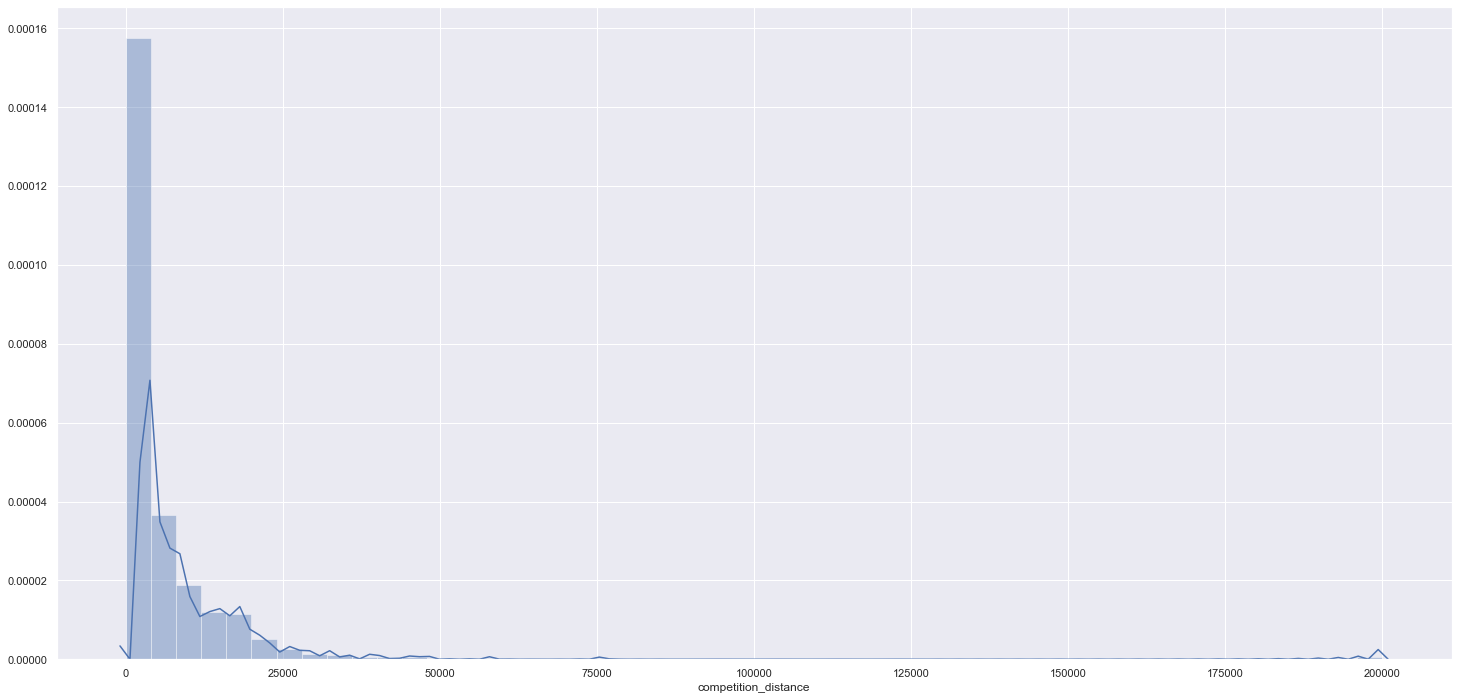

In [63]:
# Plota a distribuição da variável competition_distance
sns.distplot( df1['competition_distance'])

### 1.7.2 Variáveis categóricas

In [64]:
# Seleciona os valores por variável categórica
cat_attributes.apply(lambda x: x.unique().shape[0])

state_holiday                    4
store_type                       4
assortment                       3
competition_open_since_month    12
competition_open_since_year     23
promo2_since_week               52
promo2_since_year                7
promo_interval                   4
month_map                       12
dtype: int64

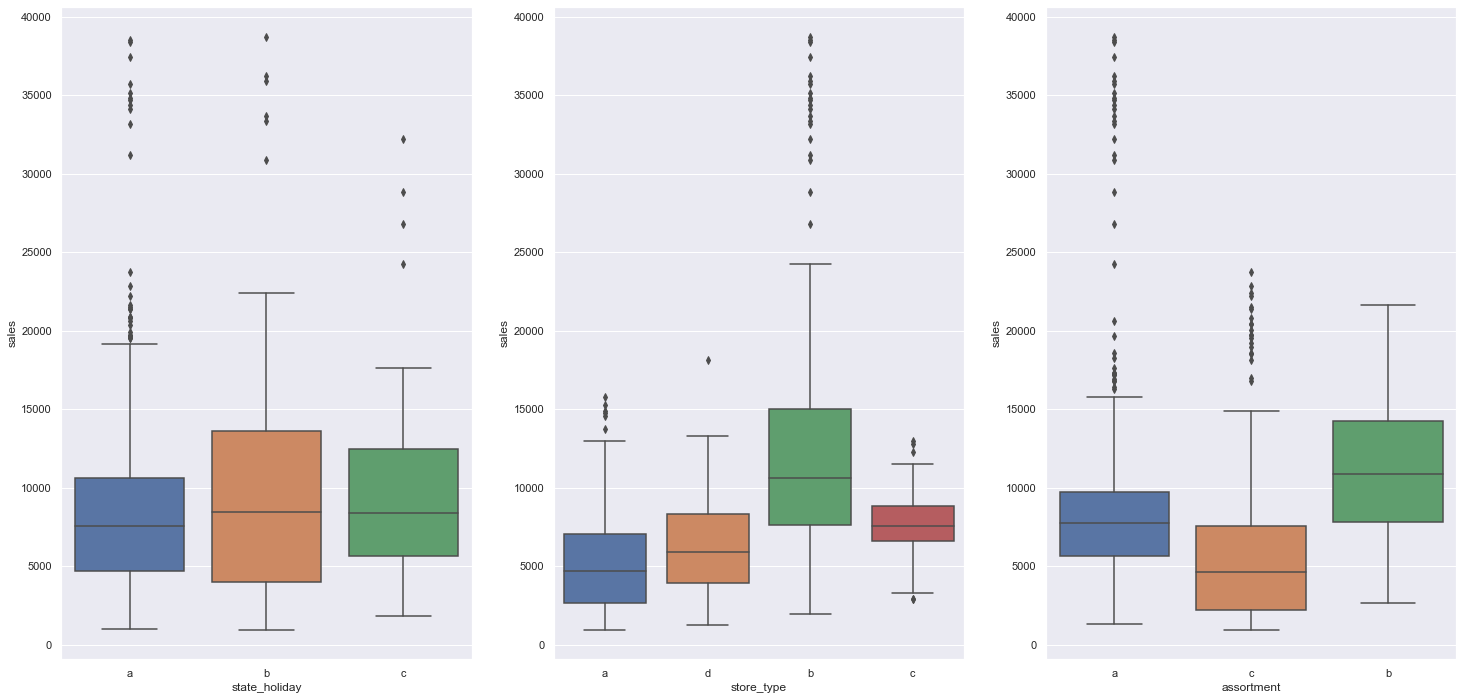

In [65]:
# Gráfico boxplot
aux = df1[(df1['state_holiday'] != '0') & (df1['sales'] > 0)]

plt.subplot( 1, 3, 1 )
sns.boxplot( x='state_holiday', y='sales', data=aux )

plt.subplot( 1, 3, 2 )
sns.boxplot( x='store_type', y='sales', data=aux )

plt.subplot( 1, 3, 3 )
sns.boxplot( x='assortment', y='sales', data=aux )

# 2.0 Passo 2 - Feature Engineering

In [66]:
df2 = df1.copy()
df2.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month             int32
competition_open_since_year              int32
promo2                                   int64
promo2_since_week                        int32
promo2_since_year                        int32
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

In [67]:
df2['year'] = pd.to_datetime( df2['date'] )
df2['month'] = pd.to_datetime( df2['date'] )
df2['day'] = pd.to_datetime( df2['date'] )
df2['week_of_year'] = pd.to_datetime(df2['date'])

## 2.1 Mapa mental de hipóteses

In [ ]:
Image('img/MindMapHypothesis.png' )

## 2.2 Criação das hipóteses

### 2.2.1 Hipóteses lojas

**1.** Lojas com número maior de funcionários deveriam vender mais.

**2.** Lojas com maior capacidade de estoque deveriam vender mais.

**3.** Lojas com maior porte deveriam vender mais.

**4.** Lojas com maior sortimentos deveriam vender mais.

**5.** Lojas com competidores mais próximos deveriam vender menos.

**6.** Lojas com competidores à mais tempo deveriam vendem mais.

### 2.2.2 Hipóteses produtos

**1.** Lojas que investem mais em Marketing deveriam vender mais.

**2.** Lojas com maior exposição de produto deveriam vender mais.

**3.** Lojas com produtos com preço menor deveriam vender mais.

**5.** Lojas com promoções mais agressivas (descontos maiores), deveriam vender mais.

**6.** Lojas com promoções ativas por mais tempo deveriam vender mais.

**7.** Lojas com mais dias de promoção deveriam vender mais.

**8.** Lojas com mais promoções consecutivas deveriam vender mais.

### 2.2.3 Hipóteses tempo

**1.** Lojas abertas durante o feriado de Natal deveriam vender mais.

**2.** Lojas deveriam vender mais ao longo dos anos.

**3.** Lojas deveriam vender mais no segundo semestre do ano.

**4.** Lojas deveriam vender mais depois do dia 10 de cada mês.

**5.** Lojas deveriam vender menos aos finais de semana.

**6.** Lojas deveriam vender menos durante os feriados escolares.

## 2.3 Lista final de hipóteses

### Lojas
**1.** Lojas com maior sortimentos deveriam vender mais.

**2.** Lojas com competidores mais próximos deveriam vender menos.

**3.** Lojas com competidores à mais tempo deveriam vendem mais.

### Produtos
**1.** Lojas com promoções ativas por mais tempo deveriam vender mais.

**2.** Lojas com mais dias de promoção deveriam vender mais.

**3.** Lojas com mais promoções consecutivas deveriam vender mais.

### Tempo
**1.** Lojas abertas durante o feriado de Natal deveriam vender mais.

**2.** Lojas deveriam vender mais ao longo dos anos.

**3.** Lojas deveriam vender mais no segundo semestre do ano.

**4.** Lojas deveriam vender mais depois do dia 10 de cada mês.

**5.** Lojas deveriam vender menos aos finais de semana.

**6.** Lojas deveriam vender menos durante os feriados escolares.

## 2.4 Feature engineering

In [68]:
# year
df2['year'] = df2['date'].dt.year

# month
df2['month'] = df2['date'].dt.month

# day
df2['day'] = df2['date'].dt.day

# week of year
df2['week_of_year'] = df2['date'].dt.weekofyear

# year week
df2['year_week'] = df2['date'].dt.strftime('%Y-%W')

# competition since
# promo since

# assortment
# state holiday


<ipython-input-68-abd2cc69e37a>:11: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df2['week_of_year'] = df2['date'].dt.weekofyear


In [69]:
df2.head().T

,0,1,2,3,4
store,1,2,3,4,5
day_of_week,5,5,5,5,5
date,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00
sales,5263,6064,8314,13995,4822
customers,555,625,821,1498,559
open,1,1,1,1,1
promo,1,1,1,1,1
state_holiday,0,0,0,0,0
school_holiday,1,1,1,1,1
store_type,c,a,a,c,a


# Fim do Código